# Outline

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Analysis

**Please visit [My Medium Article](https://medium.com/@chiayun_33/suggestions-for-airbnb-newbies-to-start-their-own-business-a-seattle-case-study-29862726bf9c) to see whole story and actionable conclusions!**

# 1. Business Understanding 

The purpose of this project is to provide the suggestions for Airbnb newbie to start their business.   
To do so, I would like to know:   

1. Does the location influence price setting?
2. Does the price change periodically?
3. What are the main attributes that super hosts are different from general hosts?


# 2. Data Understanding


- The dataset used in this project is from: [Kaggle-Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle/data), which is Airbnb dataset in 2016.
- Datasets contains three csv file as following:    
(1) **calendar.csv**: including listing id and its availability and price for a specific day.      
(2) **listings.csv**: including full descriptions and information of listing id.      
(3) **reviews.csv**: including unique reviewer id and their comments.  

   
- In this project, I only used **calendar.csv** and **listings.csv** for further analysis.

In [16]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import folium

# Show package version
print("package version")
print("---------------")
print("pandas = {}".format(pd.__version__))
print("matplotlib = {}".format(matplotlib.__version__))
print("folium = {}".format(folium.__version__))

package version
---------------
pandas = 0.25.1
matplotlib = 2.2.4
folium = 0.5.0


In [17]:
# Read data
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")

## 2.1 Take a first look at "calendar.csv" data

In [18]:
# Overview 
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [19]:
# Check the number of rows and columns  
calendar_rows_num = calendar.shape[0]
calendar_columns_num = calendar.shape[1]
print("There are {} rows in the calendar dataset.".format(calendar_rows_num))
print("There are {} columns in the calendar dataset.".format(calendar_columns_num))

There are 1393570 rows in the calendar dataset.
There are 4 columns in the calendar dataset.


In [20]:
# Chekc data type and information
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


## 2.2 Take a first look at "listings.csv" data

In [21]:
# Overview
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [22]:
# Check the number of rows and columns  
listings_rows_num = listings.shape[0]
listings_columns_num = listings.shape[1]
print("There are {} rows in the calendar dataset.".format(listings_rows_num))
print("There are {} columns in the calendar dataset.".format(listings_columns_num))

There are 3818 rows in the calendar dataset.
There are 92 columns in the calendar dataset.


In [23]:
# Chekc the columns name of the dataset
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [24]:
# Chekc data type and information
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

/Users/sandy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


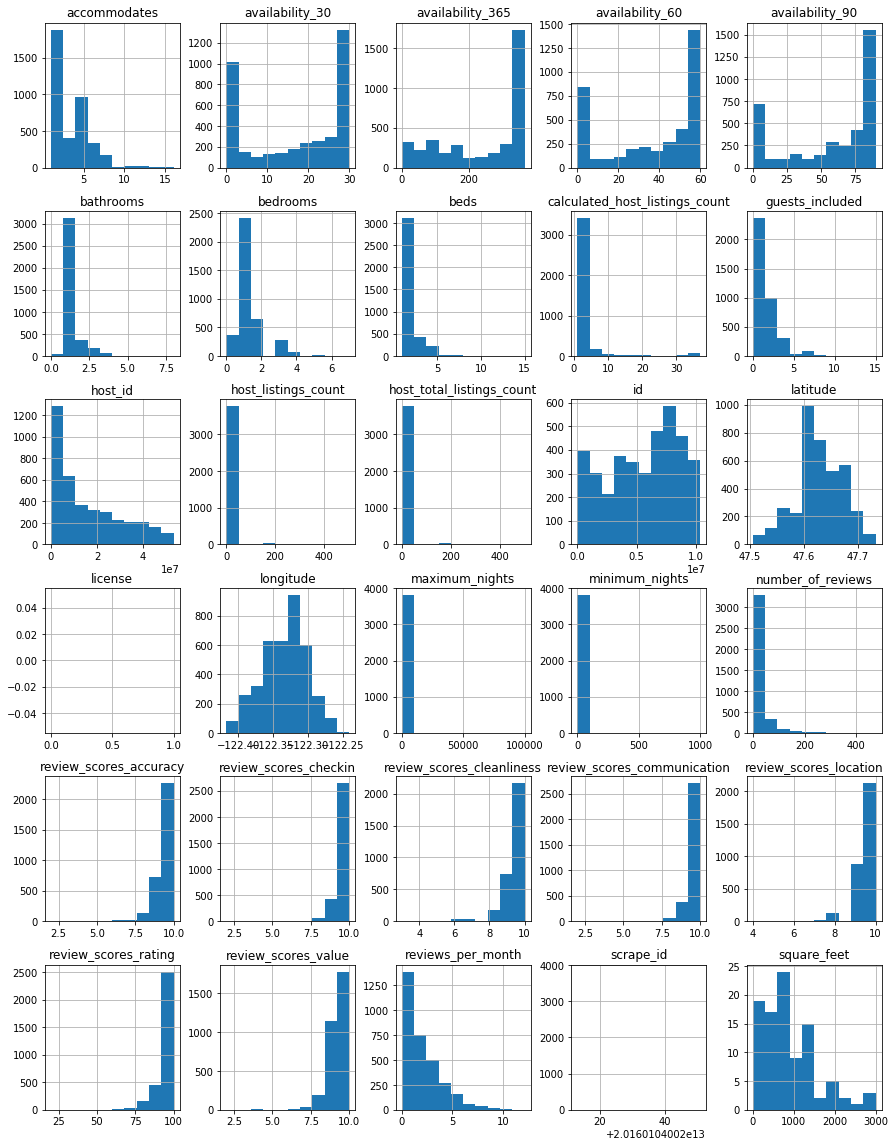

In [25]:
# Visualize the Distribution of numerical columns
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
listings.hist(ax=ax);

**Summary**
- Most of the listings have the same trend in house information (ex: beds, bathrooms, bedrooms).    
  This indicates that there are special needs in a special type of Airbnb house.          
  For example, "one bed" listing is the most common type among all the listings. It indicates that for both Airbnb host and customers, they prefer "one bed" the most. 
- The range of different types of Review socres are among 7.5~10, which indicates that most of the customers tend to give the great score on review. On the other side, it also indicates that if a host received a review score among 7.5-8, it is belong to low class among all the review score.


# 3. Data Preperation

According to answer the questions of this project, I cleaned the "price" columns of both dataset; and added new columns to the "calendar.csv" data which gives us specific information of datetime.

## 3.1 Cleaning the "calendar.csv" data

In [26]:
calendar["price"]

0          $85.00
1          $85.00
2             NaN
3             NaN
4             NaN
            ...  
1393565       NaN
1393566       NaN
1393567       NaN
1393568       NaN
1393569       NaN
Name: price, Length: 1393570, dtype: object

In [27]:
# Clean the "price" column by eliminating the "$" and ","  
# Convert data type of "price" column from object to float
calendar["price"] = calendar["price"].str.replace("$","").str.replace(",","").astype(float)

In [28]:
# Convert data type of "date" column from object to datetime
calendar["date"] = pd.to_datetime(calendar["date"])

# Add new columns: "year", "month", "day", "day_of_week" and "day_nmae"
calendar = calendar.assign(    
    year = lambda df:df.date.dt.year,
    month = lambda df:df.date.dt.month,
    day = lambda df:df.date.dt.day,
    day_of_week = lambda df:df.date.dt.weekday,
    day_name = lambda df:df.date.dt.day_name()    
)

# Set day_name order
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
calendar["day_name"]= pd.Categorical(calendar["day_name"], categories=cats, ordered=True)

# Show the cleaned dataframe
calendar.head(5)

,listing_id,date,available,price,year,month,day,day_of_week,day_name
0,241032,2016-01-04,t,85.0,2016,1,4,0,Monday
1,241032,2016-01-05,t,85.0,2016,1,5,1,Tuesday
2,241032,2016-01-06,f,NaN,2016,1,6,2,Wednesday
3,241032,2016-01-07,f,NaN,2016,1,7,3,Thursday
4,241032,2016-01-08,f,NaN,2016,1,8,4,Friday


## 3.2 Cleaning the "listings.csv" data

In [29]:
# Clean the "price" column by eliminating the "$" and ","  
# Convert data type of "price" column from object to float
listings["price"] = listings["price"].str.replace("$","").str.replace(",","").astype(float)

# 4. Data Analysis 

In this section, I listed the research questions as below, and doing the analysis to anwer these questions.


## Research Question

1. Does the location influence price setting?    
(1) Do different neighbourhoods in Seattle have different prices?   
(2) Where is the top 3 neighbourhoods with highest price? Where is the top 3 neighbourhoods with lowest price?
(3) Can we have a reference table that helps Airbnb hosts to decide their price based on neighbourhoods     
     
2. Does the price change periodically?    
(1) Does the price change monthly?    
(2) Does the price change between weekdays and weekends ?    
(3) Is the price higher on holidays than other days?    
    
3. What are the main attributes that super hosts are different from general hosts?    

## 4.1 Does the location influence price setting?  

### 4.1.1 Do different neighbourhoods in Seattle have different prices? 

In [30]:
# Count the number of neighbourhood in Seattle
num_neighbour = listings.neighbourhood_cleansed.nunique()

print("There are {} neighbourhoods in Seattle.".format(num_neighbour))

There are 87 neighbourhoods in Seattle.


In [31]:
# Define function which calculating the first quantile
def q1(x):
    return x.quantile(0.25)

# Define function which calculating the median
def q2(x):
    return x.quantile(0.5)

# Define function which calculating the third quantile
def q3(x):
    return x.quantile(0.75)

# Define function which calculating the minimum value without outlier
def remove_outlier_min(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3+1.5*iqr
    remove_outlier = x[(x > lower) & (x < upper)]
    return remove_outlier.min()


    
    return remove_outlier.min()
# Define function which calculating the maximum value without outlier
def remove_outlier_max(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3+1.5*iqr
    remove_outlier = x[(x > lower) & (x < upper)]
    return remove_outlier.max()

# Define function which calculating the mean value without outlier
def remove_outlier_mean(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3+1.5*iqr
    remove_outlier = x[(x > lower) & (x < upper)]
    return remove_outlier.mean()

    
    

# Create a new dataframe which selecting one bed listings
# Group the new dataframe by neighbourhood, and calculate max, min, and mean price
neighbour_df = listings[(listings["beds"]==1)].groupby(
    "neighbourhood_cleansed",as_index=False).agg(
    {"price":[remove_outlier_mean, "min", remove_outlier_min,\
              q1, q2, q3,\
              remove_outlier_max, "max"]})

# Drop the multiindex
neighbour_df.columns = neighbour_df.columns.droplevel(0)

# Rename the dataframe
neighbour_df.rename(
    columns={"":"neighbourhood", "remove_outlier_mean":"mean_price",\
             "min":"min_price(outlier)","remove_outlier_min":"min_price",\
             "q1":"25th percentile", "q2":"50th percentile", "q3":"75 percentile",\
             "remove_outlier_max":"max_price", "max":"max_price(outlier)"},inplace=True)

# Round "mean_price"
neighbour_df["mean_price"] = round(neighbour_df["mean_price"],2)


In [32]:
neighbour_df

,neighbourhood,mean_price,min_price(outlier),min_price,25th percentile,50th percentile,75 percentile,max_price,max_price(outlier)
0,Adams,80.16,25.0,25.0,59.75,77.0,105.00,150.0,200.0
1,Alki,90.79,40.0,40.0,87.25,100.0,120.25,129.0,399.0
2,Arbor Heights,69.67,54.0,54.0,54.50,55.0,77.50,100.0,100.0
3,Atlantic,79.42,35.0,35.0,64.25,70.0,90.00,125.0,125.0
4,Belltown,123.17,35.0,35.0,100.00,129.0,150.00,183.0,999.0
...,...,...,...,...,...,...,...,...,...
82,West Woodland,76.56,35.0,35.0,65.00,79.0,95.00,115.0,149.0
83,Westlake,83.71,65.0,65.0,68.00,85.0,101.75,122.0,190.0
84,Whittier Heights,87.33,35.0,35.0,67.00,86.0,107.00,140.0,140.0
85,Windermere,110.80,62.0,62.0,85.00,117.0,125.00,165.0,165.0


In [33]:
# geojson file: https://github.com/seattleio/seattle-boundaries-data
seattle_geo = r'neighborhoods.geojson.txt'

# create a plain seattle map
seattle_map = folium.Map(location=[47.6062,-122.3321],zoom_start=11)

# generate choropleth map 
seattle_map.choropleth(
    geo_data=seattle_geo,
    data=neighbour_df,
    columns=['neighbourhood', 'mean_price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Price per night per bed'
)

# display map
seattle_map.save("Mean price in Seattle.html")

**Summary**

As the map "Mean price in Seattle.html" showed, mean price per night per bed are different among the neighbourhood. We can find that Downtown Seattle has relative higher mean pirce.

### 4.1.2  Where is the top 3 neighbourhoods with highest price? Where is the top 3 neighbourhoods with lowest price?

In [34]:
# Select top 3 neighbourhoods which have the hisghest mean price
print("Top 3 neighbourhoods which has the highest mean price.")
neighbour_df.sort_values("mean_price", ascending = False).head(3)

Top 3 neighbourhoods which has the highest mean price.


,neighbourhood,mean_price,min_price(outlier),min_price,25th percentile,50th percentile,75 percentile,max_price,max_price(outlier)
12,Central Business District,143.44,59.0,59.0,107.5,149.5,180.75,275.0,365.0
60,Pioneer Square,137.92,50.0,50.0,95.0,145.0,160.00,250.0,250.0
58,Pike-Market,137.45,95.0,95.0,99.5,149.0,158.50,199.0,199.0


In [35]:
# Select top 3 neighbourhoods which have the lowest mean price
print("Top 3 neighbourhoods which has the lowest mean price.")
neighbour_df.sort_values("mean_price", ascending = True).head(3)

Top 3 neighbourhoods which has the lowest mean price.


,neighbourhood,mean_price,min_price(outlier),min_price,25th percentile,50th percentile,75 percentile,max_price,max_price(outlier)
7,Brighton,51.33,34.0,34.0,39.25,42.5,60.0,85.0,85.0
31,Holly Park,51.67,45.0,45.0,48.75,55.0,79.5,60.0,138.0
69,South Beacon Hill,52.67,38.0,38.0,49.00,60.0,60.0,60.0,60.0


**Summary**
- Top 3 neighbourhood have the highest mean price is *Central Business District*, *Pioneer Square* and *Pike-Market*.
- Top 3 neighoburhood have the lowest mean price is *Brighton*, *Holly Park* and *South Beacon Hill*.

### 4.1.3 Can we have a reference table that helps Airbnb hosts to decide their price based on neighbourhoods 

In [36]:
# This dataframe we create above including mean price, minimum price and maximum price
neighbour_df

,neighbourhood,mean_price,min_price(outlier),min_price,25th percentile,50th percentile,75 percentile,max_price,max_price(outlier)
0,Adams,80.16,25.0,25.0,59.75,77.0,105.00,150.0,200.0
1,Alki,90.79,40.0,40.0,87.25,100.0,120.25,129.0,399.0
2,Arbor Heights,69.67,54.0,54.0,54.50,55.0,77.50,100.0,100.0
3,Atlantic,79.42,35.0,35.0,64.25,70.0,90.00,125.0,125.0
4,Belltown,123.17,35.0,35.0,100.00,129.0,150.00,183.0,999.0
...,...,...,...,...,...,...,...,...,...
82,West Woodland,76.56,35.0,35.0,65.00,79.0,95.00,115.0,149.0
83,Westlake,83.71,65.0,65.0,68.00,85.0,101.75,122.0,190.0
84,Whittier Heights,87.33,35.0,35.0,67.00,86.0,107.00,140.0,140.0
85,Windermere,110.80,62.0,62.0,85.00,117.0,125.00,165.0,165.0


In [61]:
# Save the dataframe to csv file
neighbour_df.to_csv("Reference table for price setting.csv")

**Summary**    
Airbnb Host can use the file "Price Setting Reference based on Neighbourhoods" to reference how much they want to charge in different neighbourhoods.

## 4.2 Does the price change periodically?

### 4.2.1 Does the price change monthly?    


In [38]:
# Select the one bed listings
one_bed_listings = listings[listings["beds"]==1]

# Select the the one bed listings from calendar data
one_bed_calendar = calendar[calendar["listing_id"].isin(one_bed_listings["id"])]

# Select the year which is 2016 and "avaiable" column which is true
calendar_available = one_bed_calendar[(one_bed_calendar["year"]==2016) & \
                                      (one_bed_calendar["available"]=="t")] 


In [39]:
def calculate_mean_price(df, groupby_column):
    """
    INPUT 
        df - a dataframe holding the "pirce" column
        groupby_column - a string of the column name which you want to groupby
    
    OUTPUT
        new_df - a dataframe including round up mean price of each groupby column
    
    """
    
    # Groupby dataframe by groupby_column and calculate the mean price
    new_df = df.groupby(groupby_column).agg({"price":["mean"]}).reset_index()
    
    # Drop multiindex
    new_df.columns = new_df.columns.droplevel(0)
    
    # Rename the new dataframe
    new_df.rename(columns={"":groupby_column, "mean":"mean_price"},inplace=True)
    
    # Round up the mean price
    new_df["mean_price"] = round(new_df["mean_price"],2)
    
    return new_df
    

In [40]:
calendar_available_month = calculate_mean_price(calendar_available, "month")

In [41]:
calendar_available_month

,month,mean_price
0,1,90.53
1,2,91.42
2,3,93.82
3,4,97.12
4,5,99.07
5,6,100.60
6,7,101.47
7,8,101.09
8,9,99.54
9,10,96.60


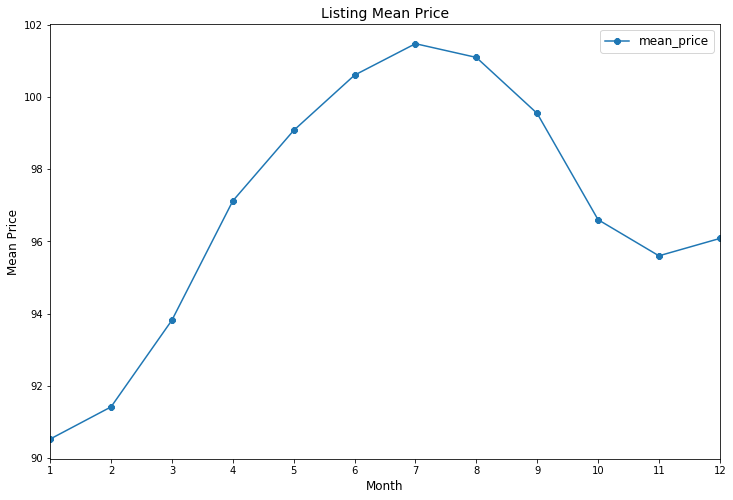

In [42]:
# Plot listing mean price fluctuating  by month
calendar_available_month.plot(x="month",y="mean_price",marker="8",figsize=(12,8))
plt.title("Listing Mean Price", fontsize = 14)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Mean Price", fontsize = 12)
plt.xticks(np.arange(1,13))
plt.legend(fontsize=12)

**Summary**
- listing mean price is fluctuating by month.
- July has the highest mean price, which is 101.47; January has the lowest mean price, which is 90.53.
- June to Augest have the higher mean price, it might indicates that the demand on these three month is higher than other month.


### 4.2.2 Does the price change between weekdays and weekends ?    

In [43]:
calendar_available_weekday = calculate_mean_price(calendar_available, "day_name")

In [44]:
calendar_available_weekday

,day_name,mean_price
0,Monday,95.45
1,Tuesday,95.33
2,Wednesday,95.39
3,Thursday,95.64
4,Friday,100.50
5,Saturday,100.61
6,Sunday,95.97


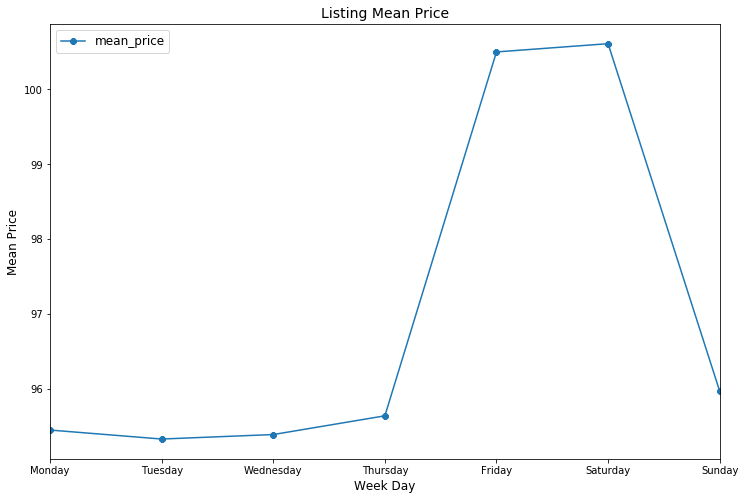

In [45]:
# Plot listing mean price fluctuating by month
calendar_available_weekday.plot(x="day_name",y="mean_price",marker="8",figsize=(12,8))
plt.title("Listing Mean Price", fontsize = 14)
plt.xlabel("Week Day", fontsize = 12)
plt.ylabel("Mean Price", fontsize = 12)
plt.legend(fontsize=12)

**Summary**
- Saturday has the highest mean price, which is 100.61, followed by Friday, which is 100.50.

### 4.2.3 Is the price higher on holidays than other days?

I choose Federal Holiday as below:    
   
2016-01-01 New Year's Day     
2016-01-18 Martin Luther King, Jr. Day (Third Monday in January)   
2016-02-15 George Washington’s Birthday, President Day (Third Monday in February)    
2016-05-30 Memorial Day (Last Monday in May)    
2016-07-04 Independence Day   
2016-09-05 Labor Day (First Monday in September)   
2016-10-10 Columbus Day (Second Monday in October)    
2016-11-11 Veterans Day    
2016-11-24 Thanksgiving Day (4th Thursday in November)   
2016-12-25 Christmas Day   
     
Reference: [Federal Holidays Calendar](https://www.redcort.com/us-federal-bank-holidays)   

In [46]:
# Create a dictionary contains the holidays and its date
holiday_dic = {"2016-01-01":"New Year's Day","2016-01-18":"Martin Luther King, Jr. Day", 
               "2016-02-15":"President Day","2016-05-30":"Memorial Day",
               "2016-07-04":"Independence Day","2016-09-05":"Labor Day",
               "2016-10-10":"Columbus Day","2016-11-11":"Veterans Day",
               "2016-11-24":"Thanksgiving Day","2016-12-25":"Christmas Day"}

In [47]:
# Select holiday information 
calendar_holiday = calendar_available[calendar_available["date"].isin(holiday_dic.keys())]

calendar_available_holiday = calculate_mean_price(calendar_holiday, "date")

# Map the holiday name into dataframe
calendar_available_holiday["holiday"] = calendar_available_holiday["date"].astype(str).map(holiday_dic)

In [48]:
calendar_available_holiday.sort_values("mean_price",ascending=False)

,date,mean_price,holiday
3,2016-07-04,100.11,Independence Day
2,2016-05-30,99.55,Memorial Day
6,2016-11-11,98.96,Veterans Day
4,2016-09-05,98.60,Labor Day
5,2016-10-10,95.20,Columbus Day
8,2016-12-25,95.19,Christmas Day
7,2016-11-24,94.54,Thanksgiving Day
1,2016-02-15,90.20,President Day
0,2016-01-18,88.97,"Martin Luther King, Jr. Day"


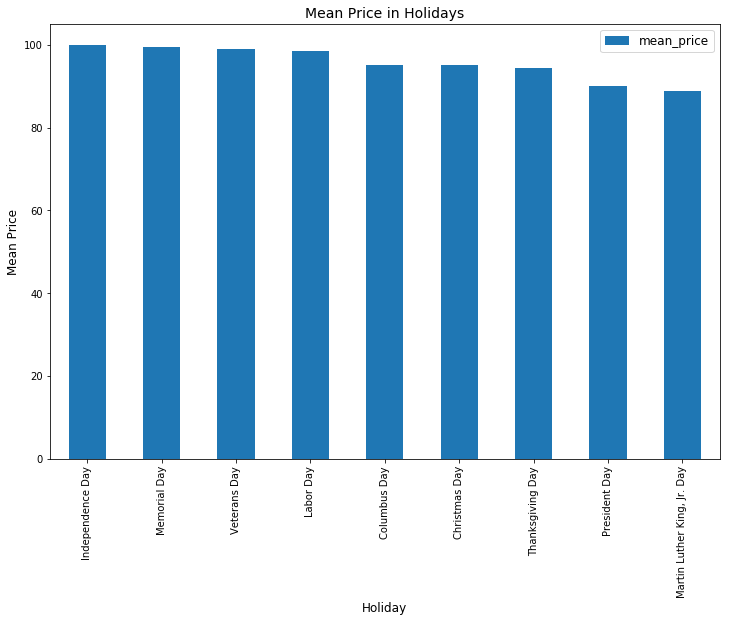

In [49]:
# Sort_value by mean price
calendar_available_holiday.sort_values("mean_price",ascending=False, inplace=True)

# Plot holiday mean price
calendar_available_holiday.plot.bar(x="holiday",y="mean_price",figsize=(12,8))

plt.title("Mean Price in Holidays", fontsize=14)
plt.xlabel("Holiday", fontsize=12)
plt.ylabel("Mean Price", fontsize=12)
plt.legend(fontsize=12)

**Notes**
- As we know that price is fluctuating by month, we need to compare holidays to monthly mean price to find out whether pirce is higher during holiday.

In [50]:
# Select the data which not in holidays
calendar_not_holiday = calendar_available[~calendar_available["date"].isin(holiday_dic.keys())]

# Calculate monthly mean pirce
calendar_not_holiday = calculate_mean_price(calendar_not_holiday, "month")

calendar_not_holiday 

,month,mean_price
0,1,90.60
1,2,91.46
2,3,93.82
3,4,97.12
4,5,99.06
5,6,100.60
6,7,101.52
7,8,101.09
8,9,99.57
9,10,96.64


In [51]:
# Add new column "holiday_month"
calendar_available_holiday = calendar_available_holiday.assign(
     holiday_month = lambda df:df.date.dt.month
)

# Map calendar_available_holiday with month_mean_price
calendar_available_holiday["month_mean_price"] = \
calendar_available_holiday["holiday_month"].map(calendar_not_holiday.set_index("month")["mean_price"])

# Rename the dataframe
calendar_available_holiday.rename(columns={"mean_price":"holiday_mean_price"},inplace=True)

# Calculate the difference between holiday mean price with month mean price
calendar_available_holiday["price_difference"] = \
calendar_available_holiday["holiday_mean_price"] - calendar_available_holiday["month_mean_price"]

In [52]:
# Show dataframe with styling to show the price difference
calendar_available_holiday.style.bar(subset=['price_difference'], align='mid', color=['#d65f5f', '#5fba7d'])

,date,holiday_mean_price,holiday,holiday_month,month_mean_price,price_difference
3,2016-07-04 00:00:00,100.11,Independence Day,7,101.52,-1.41
2,2016-05-30 00:00:00,99.55,Memorial Day,5,99.06,0.49
6,2016-11-11 00:00:00,98.96,Veterans Day,11,95.52,3.44
4,2016-09-05 00:00:00,98.6,Labor Day,9,99.57,-0.97
5,2016-10-10 00:00:00,95.2,Columbus Day,10,96.64,-1.44
8,2016-12-25 00:00:00,95.19,Christmas Day,12,96.11,-0.92
7,2016-11-24 00:00:00,94.54,Thanksgiving Day,11,95.52,-0.98
1,2016-02-15 00:00:00,90.2,President Day,2,91.46,-1.26
0,2016-01-18 00:00:00,88.97,"Martin Luther King, Jr. Day",1,90.6,-1.63


**Summary**
- Only the price of Veterans Day and Memorial Day higher than average month price.
- It can not indicates that the mean prices on holidays are higher than general days.

## 4.3 What are the main attributes that super hosts are different from general hosts? 

In [53]:
# Calculate the number of super host
super_host_num = listings[listings["host_is_superhost"]=="t"]["host_is_superhost"].count()

# Calculate the number of general host
general_host_num = listings[listings["host_is_superhost"]=="f"]["host_is_superhost"].count()

# Calculate the percentage of super host among all the host
super_host_perc = super_host_num*100/(listings["host_is_superhost"].notnull().sum())

# Print the result
print("There are {} Super Host".format(super_host_num))
print("There are {} General Host".format(general_host_num))
print("The proportion of Super Host among all the hosts is {:.2f}%".format(super_host_perc))

There are 778 Super Host
There are 3038 General Host
The proportion of Super Host among all the hosts is 20.39%


In [54]:
# Calculate the number of review score rating of super host
review_score_rating_super_num = \
listings.groupby("host_is_superhost")["review_scores_rating"].get_group("t").count()

# Calculate the number of review score rating of general host
review_score_rating_general_num = \
listings.groupby("host_is_superhost")["review_scores_rating"].get_group("f").count()

# Calculate the responsed rate of super host
review_score_rating_super_perc = \
review_score_rating_super_num*100/super_host_num

# Calculate the responsed rate of general host
review_score_rating_geneneral_perc = \
review_score_rating_general_num*100/general_host_num



print("There are {} of review socres rating for Super Host. \
The responsed rate is {:.2f}% ".format(
    review_score_rating_super_num, review_score_rating_super_perc))

print("There are {} of review socres rating for General Host. \
The responsed rate is {:.2f}%.".format(
    review_score_rating_general_num, review_score_rating_geneneral_perc))


There are 751 of review socres rating for Super Host. The responsed rate is 96.53% 
There are 2420 of review socres rating for General Host. The responsed rate is 79.66%.


In [55]:
# Calculate the mean review score rating of super host
review_score_rating_super = \
listings.groupby("host_is_superhost")["review_scores_rating"].get_group("t").mean()

# Calculate the mean review score rating of general host
review_score_rating_general = \
listings.groupby("host_is_superhost")["review_scores_rating"].get_group("f").mean()


print("The mean review score of Super Host is {:.2f}".format(
    review_score_rating_super))
print("The mean review score of General Host is {:.2f}".format(
    review_score_rating_general))

The mean review score of Super Host is 97.40
The mean review score of General Host is 93.65


([<matplotlib.axis.XTick at 0x1a19289910>,
 <a list of 11 Text xticklabel objects>)

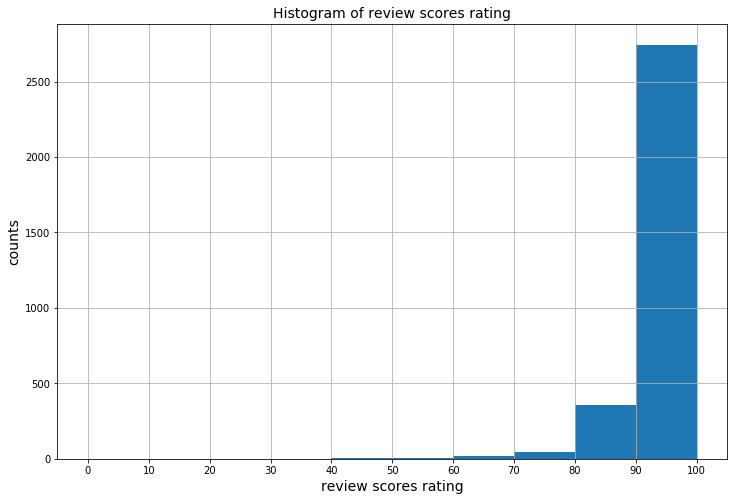

In [56]:
# Draw histogram of review score rating
listings.review_scores_rating.hist(figsize=(12,8),bins=[i for i in range(0,110,10)])
plt.title("Histogram of review scores rating", fontsize=14)
plt.xlabel("review scores rating",fontsize=14)
plt.ylabel("counts",fontsize=14)
plt.xticks([i for i in range(0,110,10)])

In [57]:
review_items = ['review_scores_accuracy','review_scores_cleanliness', 
                'review_scores_checkin','review_scores_communication', 
                'review_scores_location','review_scores_value']

labels = ["Accuracy","Cleanliness","Checkin","Communication","Location","Value"]

super_mean = []
general_mean = []

# Create mean score in each items for Super Host
for i in review_items:
    super_mean.append(round(listings.groupby("host_is_superhost")[i].get_group("t").mean(),2))

# Create mean score in each items for General Host
for i in review_items:
    general_mean.append(round(listings.groupby("host_is_superhost")[i].get_group("f").mean(),2)) 
    
# Create a dataframe which include the mean score of each review items of Super Host and General Host
data ={"Super Host":super_mean, "General Host":general_mean}     
reivew_score = pd.DataFrame(data, index=labels)

# Calculate the difference of review score between Super Host and General Host
reivew_score["difference"] = reivew_score["Super Host"] - reivew_score["General Host"] 


In [58]:
# Show dataframe with styling to show the price difference
reivew_score.style.bar(subset=['difference'], align='mid', color=['#d65f5f', '#5fba7d'])

,Super Host,General Host,difference
Accuracy,9.91,9.55,0.36
Cleanliness,9.89,9.45,0.44
Checkin,9.96,9.73,0.23
Communication,9.97,9.76,0.21
Location,9.75,9.56,0.19
Value,9.75,9.36,0.39


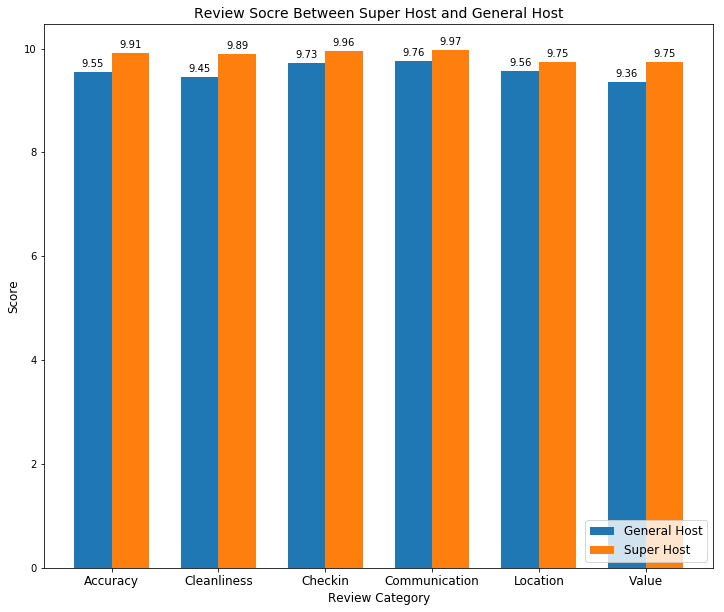

In [59]:
# Visualize the review score
x = np.arange(len(labels)) # label location
width = 0.35 # width of bars

fig, ax = plt.subplots(figsize=(12,10))
bar1 = ax.bar(x-width/2, general_mean, width, label="General Host")
bar2 = ax.bar(x+width/2, super_mean, width, label="Super Host")

ax.set_ylabel("Score",fontsize=12)
ax.set_title("Review Socre Between Super Host and General Host",fontsize=14)
ax.set_xticks(x)
ax.set_xlabel("Review Category",fontsize=12)
ax.set_xticklabels(labels,fontsize=12)
ax.legend(loc=4,fontsize=12)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    

autolabel(bar1)
autolabel(bar2)



**Summary**
- The review socres of Super Host is higher than General Host in every items.
- "Cleanliness" is biggeset difference between Super Host and General Host, followed by "Value" and "Accuracy". It indicates that if you want to become a Super Host, you could put more effort on these two items.

**Please visit [My Medium Article](https://medium.com/@chiayun_33/suggestions-for-airbnb-newbies-to-start-their-own-business-a-seattle-case-study-29862726bf9c) to see whole story and actionable conclusions!**